In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv

--2022-03-22 15:02:11--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.150
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39965 (39K) [text/csv]
Saving to: ‘audit.csv’

audit.csv           100%[===================>]  39.03K  --.-KB/s    in 0.09s   

2022-03-22 15:02:12 (443 KB/s) - ‘audit.csv’ saved [39965/39965]



In [3]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('audit.csv') 
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [4]:
df = df.dropna()

In [5]:
# separating the data and labels
X_ = df.drop(['Risk','LOCATION_ID'], axis=1)
y = df['Risk']

In [6]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.66907089  0.30412945  1.4285004  ... -0.19682237 -0.24673663
  -0.35348365]
 [-0.66907089 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [-0.66907089 -0.34218966 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 ...
 [ 1.45892742 -0.38973902 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.39678337 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]]


In [7]:
X = standardized_data
y = df['Risk']

In [8]:
df_ =df[["Score","SCORE_A","SCORE_B","Sector_score","MONEY_Marks","Risk"]]
X_ = df_.drop("Risk",axis=1)
y  = df_["Risk"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [10]:
classifier = DecisionTreeClassifier()

In [11]:
#training the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [13]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [14]:
labels = ['No Risk', 'Risk']

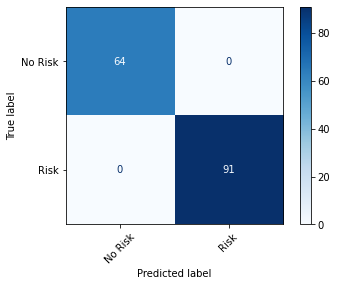

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [16]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [17]:
!pip install plot-metric --quiet

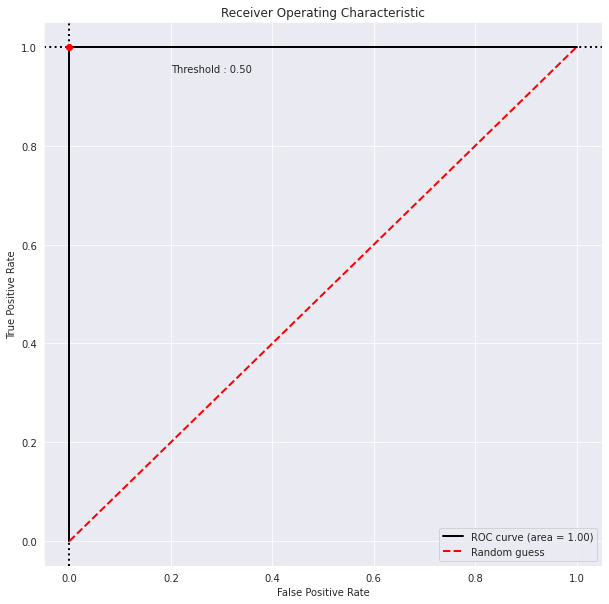

In [18]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

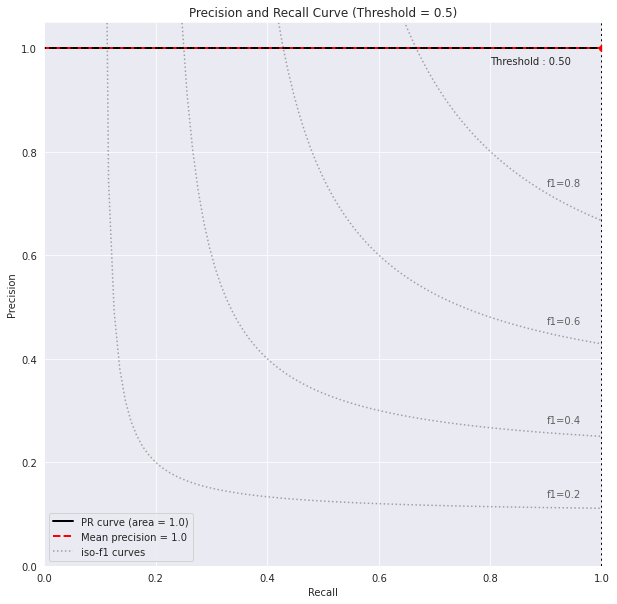

In [19]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

In [20]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No risk')
else:
  print('Risk')

[[-0.66907089  0.30412945  1.4285004  -0.16600583 -0.66737367 -0.12775581
  -0.25617377 -0.2954917  -0.16161448 -0.57038257 -0.41171201 -0.161048
  -0.16512893 -0.19682237 -0.24673663 -0.35348365]]
1
Risk
